# Regresión Logística
Dataset con target 0-1

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')

In [31]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [33]:
class_0_df = df[df['Outcome'] == 0]
class_1_df = df[df['Outcome'] == 1]

class_0_sampled = class_0_df.sample(n=320, random_state=42)  

balanced_df = pd.concat([class_0_sampled, class_1_df])

# Mezcla las filas en el DataFrame equilibrado para mezclar las clases
balanced_df = balanced_df.sample(frac=1, random_state=42)
balanced_df['Outcome'].value_counts()

Outcome
0    320
1    268
Name: count, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    balanced_df.drop('Outcome', axis=1),
    balanced_df['Outcome'],
    test_size=(1.0/3), random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter= 1000)
logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

El umbral por defecto es 0.5

In [36]:
Y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [37]:
from sklearn.metrics import accuracy_score

threshold = 0.4
y_proba = logreg.predict_proba(X_test)[:, 1] # Pedimos la probabilidad de la clase positiva
y_pred_04 = (y_proba >= threshold).astype(int)

accuracy = accuracy_score(Y_test, y_pred_04)
print(f'Accuracy of logisitic regression classifier with threshold {threshold}: {accuracy:.2f}')


Accuracy of logisitic regression classifier with threshold 0.4: 0.74


- logreg.predict() devuelve un array con las clases, es decir 0s y 1s
- logreg.predict_proba() devuelve un array con la probabilidad de que la clase sea 1

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("precision: ", precision_score(Y_test, Y_pred))
print("recall: ", recall_score(Y_test, Y_pred))
print("f1: ", f1_score(Y_test, Y_pred))


precision:  0.7283950617283951
recall:  0.686046511627907
f1:  0.7065868263473054


- Precision: cuan creible soy cuando digo positivo
- Recall : cuantos positivos logre detectar

In [39]:
print("precision: ", precision_score(Y_test, y_pred_04))
print("recall: ", recall_score(Y_test, y_pred_04))
print("f1: ", f1_score(Y_test, y_pred_04))

precision:  0.6605504587155964
recall:  0.8372093023255814
f1:  0.7384615384615385


Notar que en el segundo caso, aunque hayamos tenido un accuracy mas alto, el f1 es mas bajo

- **Precisión (Precision):**

  $$
  \text{Precisión} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Positivos}}
  $$


- **Recuperación (Recall):**

  $$
  \text{Recuperación} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Negativos}}
  $$

- **F1 Score:**

  $$
  \text{F1 score} = 2 \times \frac{\text{Precisión} \times \text{Recuperación}}{\text{Precisión} + \text{Recuperación}}
  $$


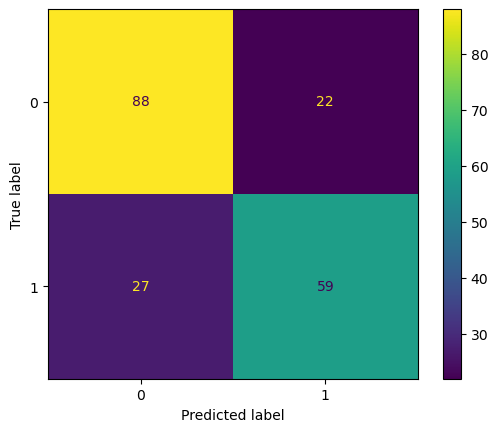

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Práctico: Regresión Logística

En este práctico vamos a implementar un modelo de regresión logística. Para ello, utilizaremos el dataset de sklearn `breast_cancer`, que contiene información sobre características de tumores de mama y su diagnóstico (maligno o benigno).


In [41]:
breast_cancer_df = pd.read_csv("breast-cancer-wisconsin.csv")
breast_cancer_df.columns = ["Id", "clump_thicknes", "cell_size", "cell_shape", "adhesion", "epithelial_cell_size", "nuclei", "chromatin", "nucleoli", "mitoses", "target"]

# En el dataset las clases son 2 y 4 que representan Benigno y Maligno, vamos a reemplazarlas por 0 y 1 por simplicidad.
breast_cancer_df['target'] = breast_cancer_df["target"].replace(2, 0)
breast_cancer_df['target'] = breast_cancer_df["target"].replace(4, 1)
breast_cancer_df.drop(columns="Id", inplace=True)

breast_cancer_df.head()


,clump_thicknes,cell_size,cell_shape,adhesion,epithelial_cell_size,nuclei,chromatin,nucleoli,mitoses,target
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1
